In [1]:
!pip install -Uqq fastai duckduckgo_search

In [3]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *

def search_images(temp, max_images = 100):
    print(f"Searching Images for{temp}")
    return L(ddg_images(temp, max_results=max_images)).itemgot('image')

In [4]:
find = 'Giant Panda', 'Speclated Bear', 'Sun Bear', 'Sloth Bear', 'American Black Bear', 'Asian Black Bear', 'Brown Bear', 'Polar Bear'
path = Path('Bear_classifier/Species')

from time import sleep
for i in find:
    destination =path/i
    destination.mkdir(exist_ok=True, parents=True)
    download_images(destination, urls=search_images(f"{i} images"))
    sleep(10)
    resize_images(path/i, max_size = 400, destination = path/i)
    

Searching Images forGiant Panda images


C:\Users\khushi garg\anaconda3\lib\site-packages\duckduckgo_search\compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
C:\Users\khushi garg\anaconda3\lib\site-packages\duckduckgo_search\compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
C:\Users\khushi garg\anaconda3\lib\site-packages\duckduckgo_search\compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


Searching Images forSpeclated Bear images
Searching Images forSun Bear images
Searching Images forSloth Bear images
Searching Images forAmerican Black Bear images
Searching Images forAsian Black Bear images
Searching Images forBrown Bear images
Searching Images forPolar Bear images


In [6]:
failed_images = verify_images(get_image_files(path))
failed_images.map(Path.unlink)
len(failed_images)

33

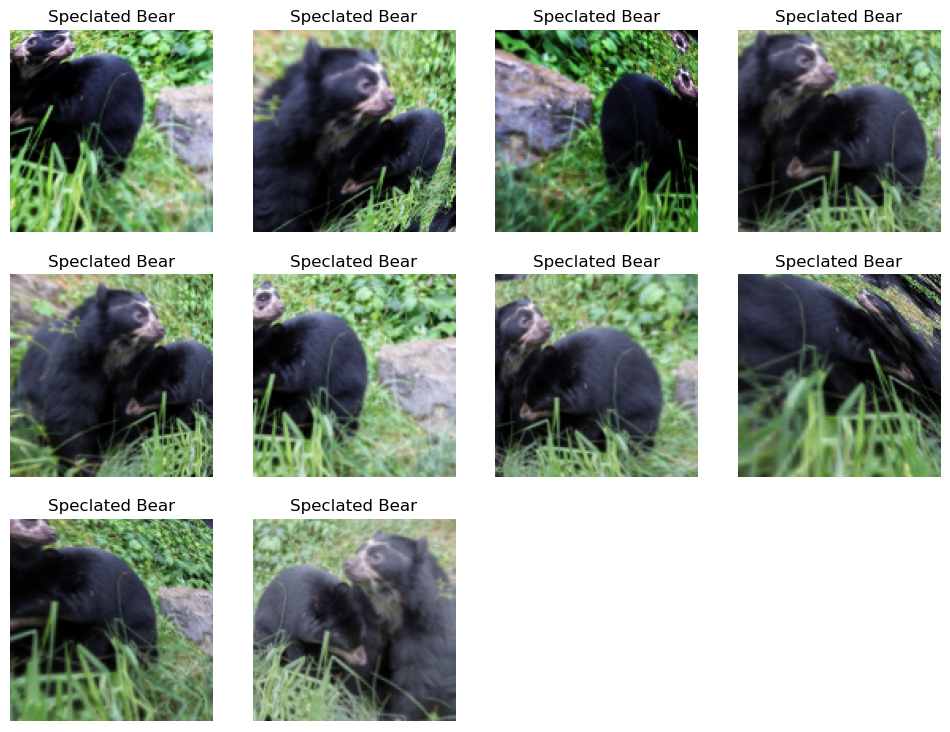

In [8]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed=42),
    get_y = parent_label,
    item_tfms = [Resize(128)],
    batch_tfms = aug_transforms(mult=2)
).dataloaders(path, bs=32)

bears.show_batch(max_n=10, unique = True)

In [10]:
learn = vision_learner(bears, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.724168,1.240836,0.376923,00:45


epoch,train_loss,valid_loss,error_rate,time
0,1.426964,0.955148,0.276923,00:50
1,1.292869,0.955421,0.253846,00:50
2,1.116647,1.067775,0.253846,00:50
3,1.003378,1.028009,0.238462,00:52
4,0.943880,0.997075,0.230769,00:52


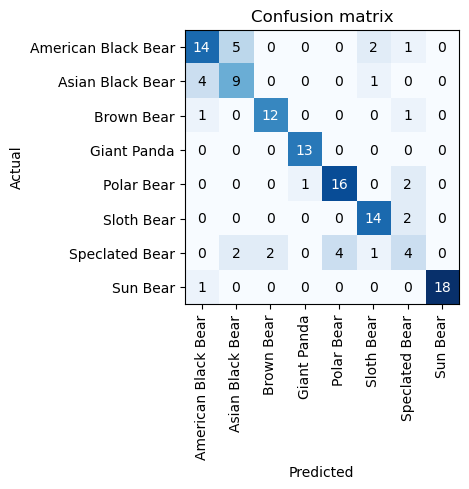

In [12]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

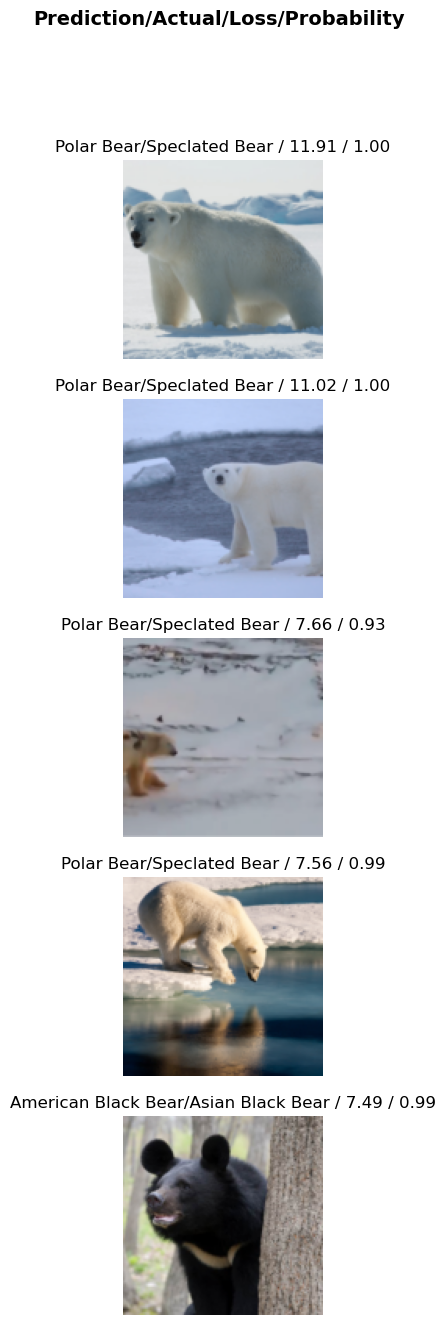

In [13]:
intrepret.plot_top_losses(5, nrows=5)

In [14]:
from fastai.vision.widgets import *
clean = ImageClassifierCleaner(learn)
clean

In [15]:
for f in clean.delete():
    clean.fns[f]

In [16]:
ls

 Volume in drive C is OS
 Volume Serial Number is 6C3A-19AD

 Directory of C:\Users\khushi garg\Bear_Classifier

02-08-2023  20:52    <DIR>          .
02-08-2023  20:13    <DIR>          ..
02-08-2023  19:58    <DIR>          .ipynb_checkpoints
02-08-2023  20:20            14,369 009f8a00-37d7-491c-8682-902fe3c79f39.jpg
02-08-2023  20:20            28,094 00cc7b23-dc67-4034-a686-459c985eb5b2.jpg
02-08-2023  20:28            25,919 01ce6a6c-eeb5-42ef-a846-88d56fbf96c2.jpg
02-08-2023  20:21            17,893 01ddedbb-ab4a-4b64-8aa9-ff6468ec247c.jpg
02-08-2023  20:25            21,467 022cf1a1-2298-4273-9a23-98a09fc35e2b.jpeg
02-08-2023  20:25            22,903 0246031b-8b47-4f1c-8b87-d3013b8f20a1.jpg
02-08-2023  20:21            20,430 02e3279f-9e85-4e21-8c9a-b3d82f7faa73.jpg
02-08-2023  20:19            22,142 03466219-532e-4754-aa32-55efd32388b6.jpg
02-08-2023  20:23            22,859 041b9f71-43b8-4592-9c1e-1c8f41527400.jpg
02-08-2023  20:29             8,444 057320ba-a358-4798-9bbe-7

In [17]:
categories=('American Black Bear', 'Asian Black Bear','Brown Bear', 'Giant Panda','Polar Bear','Sloth Bear','Speclated Bear','Sun Bear')
def predict_this (img):
    who_is_this,_,probs = learn.predict(PILImage.create(img))
    return dict(zip(categories,map(float,probs)))

In [18]:
who_is_this,_,probs = learn.predict(PILImage.create('panda.jfif'))
print(f'This is {who_is_this}.')
print(f'{probs[3]}')

This is Giant Panda.
1.0


In [21]:
who_is_this,_,probs = learn.predict(PILImage.create('speclated.jfif'))
print(f'This is {who_is_this}.')
print(f'{probs[6]}')

This is Speclated Bear.
0.5254979729652405


In [22]:
who_is_this,_,probs = learn.predict(PILImage.create('sloth.jfif'))
print(f'This is {who_is_this}.')
print(f'{probs[5]}')

This is Sloth Bear.
0.9960902333259583


In [23]:
import gradio as gr

In [24]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['panda.jfif', 'speclated.jfif','sloth.jfif']

intf = gr.Interface(fn=predict_this, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\khushi garg\anaconda3\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
